#  <span style="color:red">DATA SET</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train_X = pd.read_csv('train_X_ZmcsN1q.csv')
df_train_X.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9
0,0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,53.0,46.0,52.0,44.0,40.0,38.0,54.0,36.0,39.0,42.0
1,1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,55.0,47.0,54.0,45.0,41.0,39.0,55.0,37.0,40.0,43.0
2,2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,84.5,54.0,78.0,49.0,47.0,42.0,63.0,42.0,48.0,49.0
3,3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,97.0,59.0,84.0,55.0,58.0,48.0,72.0,51.0,57.0,59.0
4,4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,99.0,67.0,95.0,63.0,67.0,48.0,82.0,59.0,64.0,65.0


In [10]:
df_train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695255 entries, 0 to 695254
Data columns (total 36 columns):
ID                        695255 non-null int64
station_id                695255 non-null int64
hdres_100                 695255 non-null float64
hdres_500                 695255 non-null float64
ldres_100                 695255 non-null float64
ldres_500                 695255 non-null float64
industry_100              695255 non-null float64
industry_500              695255 non-null float64
urbgreen_100              695255 non-null float64
urbgreen_500              695255 non-null float64
roads_length_25           695255 non-null float64
roads_length_100          695255 non-null float64
roads_length_500          695255 non-null float64
major_roads_length_25     695255 non-null float64
major_roads_length_100    695255 non-null float64
major_roads_length_500    695255 non-null float64
distance_0                695255 non-null float64
distance_1                695255 non-null f

In [3]:
df_train_Y = pd.read_csv('train_Y_5fzj9UT.csv')
df_train_Y.head()

,ID,value
0,0,48.0
1,1,50.0
2,2,62.0
3,3,67.0
4,4,75.0


In [4]:
df_test_X = pd.read_csv('test_X_qMo934q.csv')

#  <span style="color:red">DATA VIZ</span>

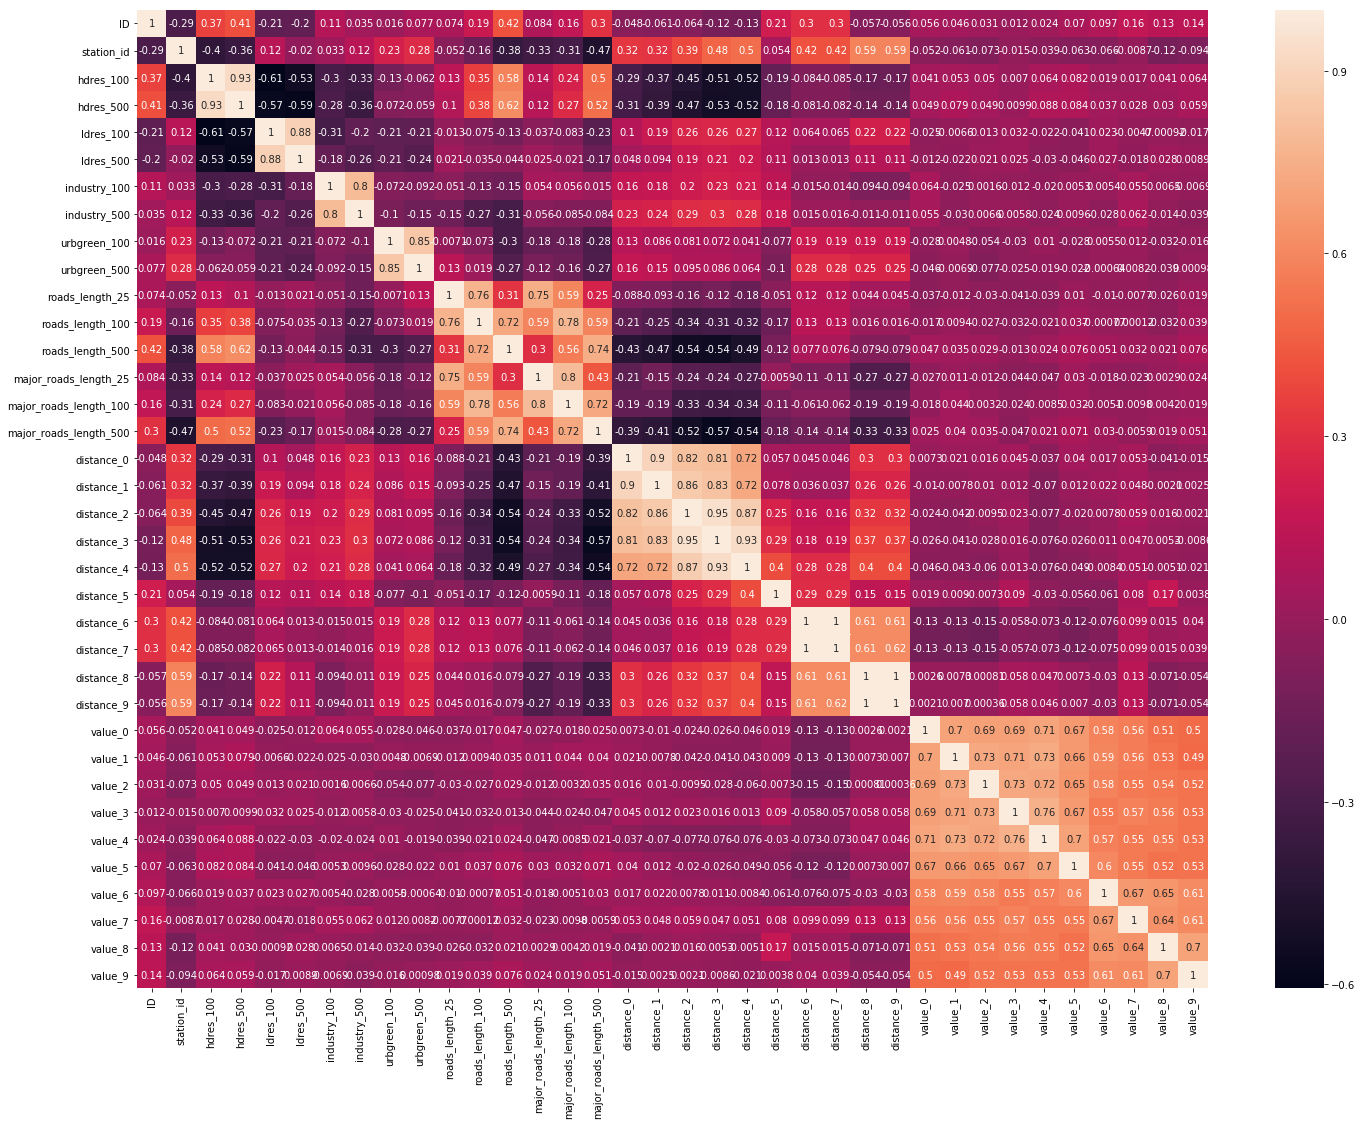

In [13]:
plt.figure(figsize=(24,18))
sns.heatmap(df_train_X.corr(), annot=True)

Distance 6 et 7, ainsi que 8 et 9 corrélées à 1...!

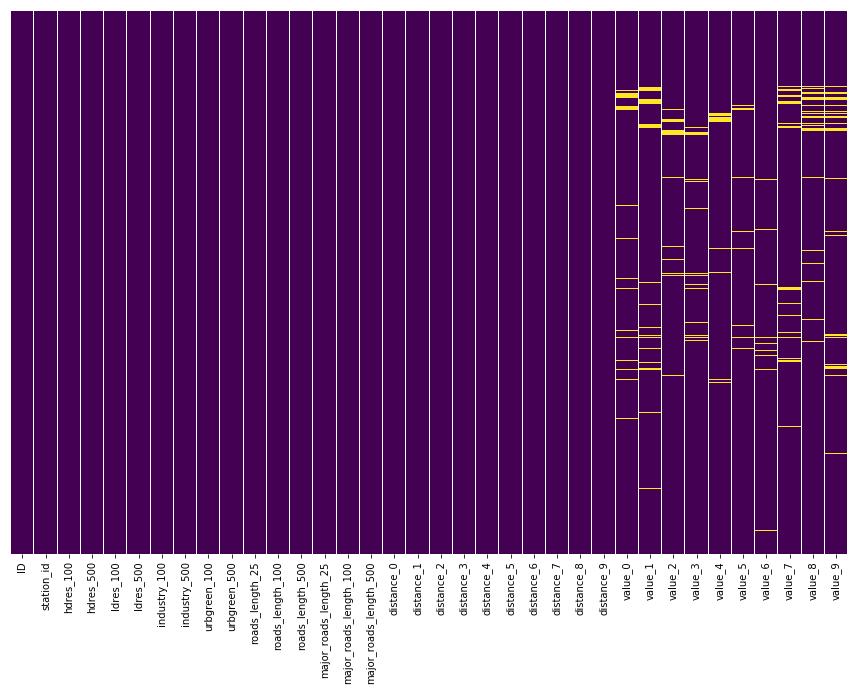

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train_X.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df_train_X.isna().sum()

ID                            0
station_id                    0
hdres_100                     0
hdres_500                     0
ldres_100                     0
ldres_500                     0
industry_100                  0
industry_500                  0
urbgreen_100                  0
urbgreen_500                  0
roads_length_25               0
roads_length_100              0
roads_length_500              0
major_roads_length_25         0
major_roads_length_100        0
major_roads_length_500        0
distance_0                    0
distance_1                    0
distance_2                    0
distance_3                    0
distance_4                    0
distance_5                    0
distance_6                    0
distance_7                    0
distance_8                    0
distance_9                    0
value_0                   21605
value_1                   30245
value_2                   20751
value_3                   13919
value_4                   16561
value_5 

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


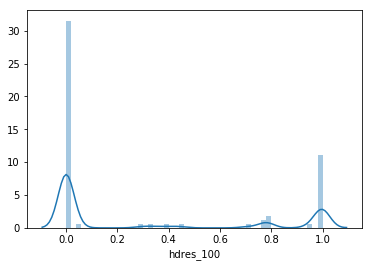

In [16]:
sns.distplot(df_train_X["hdres_100"])

In [17]:
df_train_X['value_0'].mean()

23.523112640094865

#  <span style="color:red">DELETING THE NAN VALUES</span>

In [8]:
df_train_X.dropna(inplace=True)
df_test_X.dropna(inplace=True)

In [9]:
pd.DataFrame.to_csv(df_train_X, 'df_train_x_nona', sep=',', index=False)

In [10]:
pd.DataFrame.to_csv(df_test_X, 'df_test_x_nona', sep=',', index=False)

#  <span style="color:red">FILLING THE NAN VALUES - MEAN by STATION</span>

#  <span style="color:black">TRAIN DATA SET</span>

In [18]:
numbers = ['0','1','2','3','4','5','6','7','8','9']
tab_values = ['value_'+number for number in numbers]

In [19]:
tab_values

['value_0',
 'value_1',
 'value_2',
 'value_3',
 'value_4',
 'value_5',
 'value_6',
 'value_7',
 'value_8',
 'value_9']

In [20]:
len(df_train_X.station_id.unique())

85

In [21]:
for i in df_train_X.station_id.unique():
    for value in tab_values:
        df_train_X[value][df_train_X['station_id']==i] = df_train_X[value][df_train_X['station_id']==i].fillna(value=df_train_X[value][df_train_X['station_id']==i].mean())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


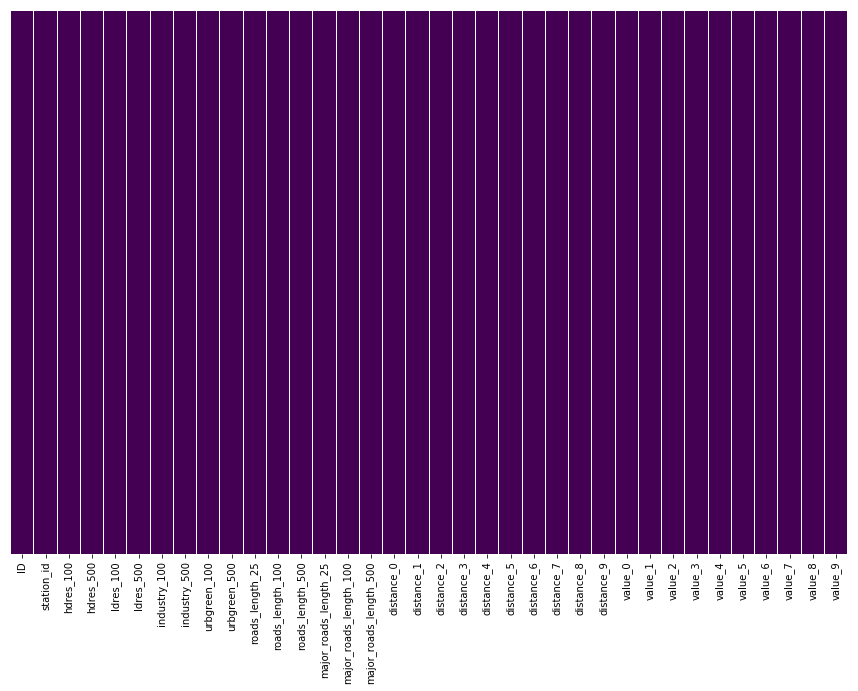

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train_X.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
pd.DataFrame.to_csv(df_train_X, 'df_train_X_clean.csv', sep=',', index=False)

#  <span style="color:black">TEST DATA SET</span>

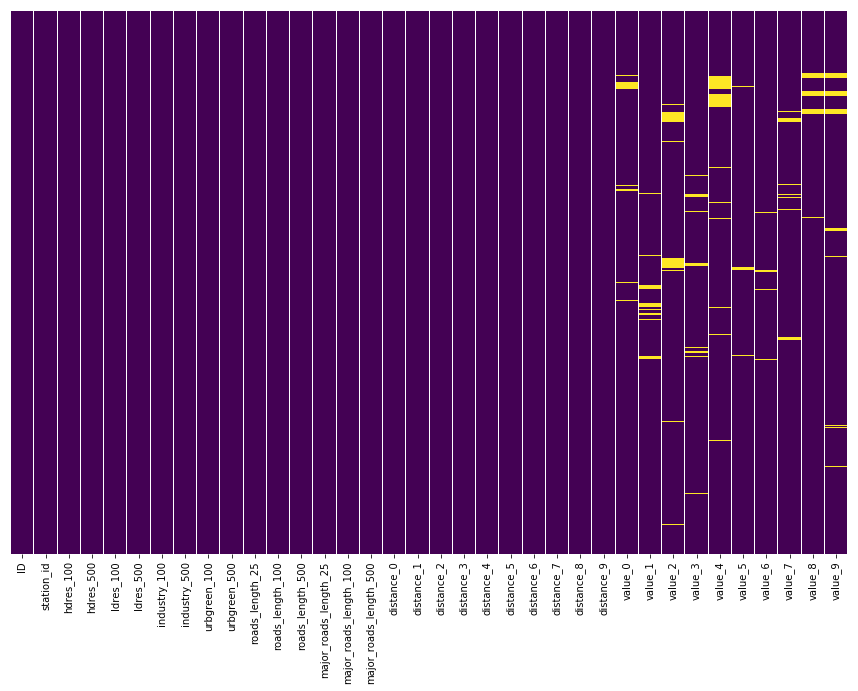

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test_X.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
for i in df_test_X.station_id.unique():
    for value in tab_values:
        df_test_X[value][df_test_X['station_id']==i] = df_test_X[value][df_test_X['station_id']==i].fillna(value=df_test_X[value][df_test_X['station_id']==i].mean())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df_test_X.station_id.unique()

array([ 98, 103,  73,  84,  75, 112, 115,  91,  60, 101,  13,  41,  43,
        42,  46,  12,  50,  44,  70,  51,  47,  29,  33,  31, 107,  79,
        81,   1,  58,  27,  36], dtype=int64)

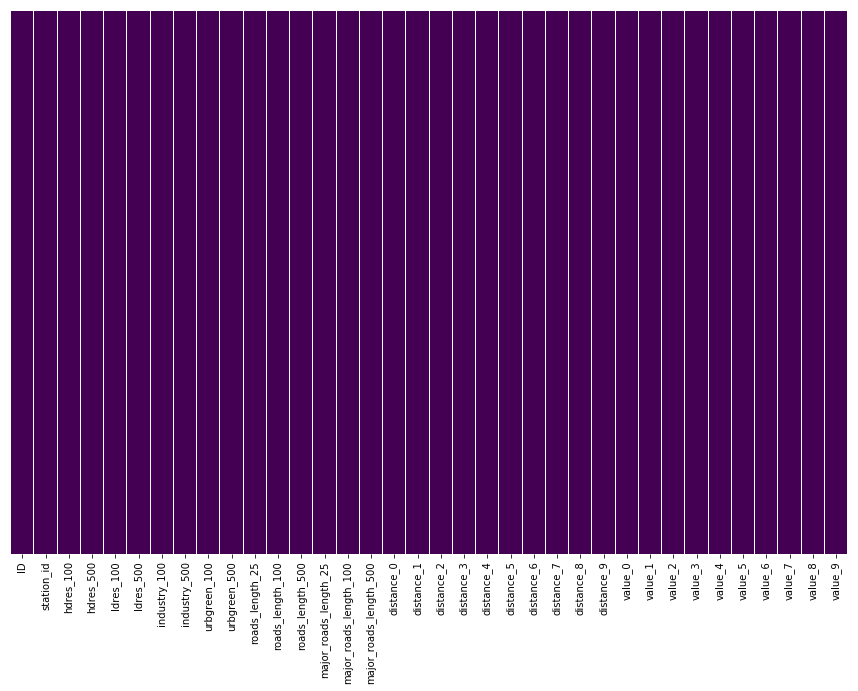

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test_X.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
pd.DataFrame.to_csv(df_test_X, 'df_test_X_clean.csv', sep=',', index=False)

#  <span style="color:red">FILLING THE NAN VALUES - MEDIANE by STATION</span>